In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 7.2

### Detecting Periodicity
In the on-line resources there is a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

a) Write a program that reads the data in the file and makes a graph of sunspots as a function of time. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in months.



In [3]:
data = pd.read_csv("/home/xavier/Downloads/sunspots.txt", delim_whitespace=True, header=None, names=['month', 'sunspots'])

time_months = data['month'].values
sunspots = data['sunspots'].values

/tmp/ipykernel_5019/2597524206.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("/home/xavier/Downloads/sunspots.txt", delim_whitespace=True, header=None, names=['month', 'sunspots'])


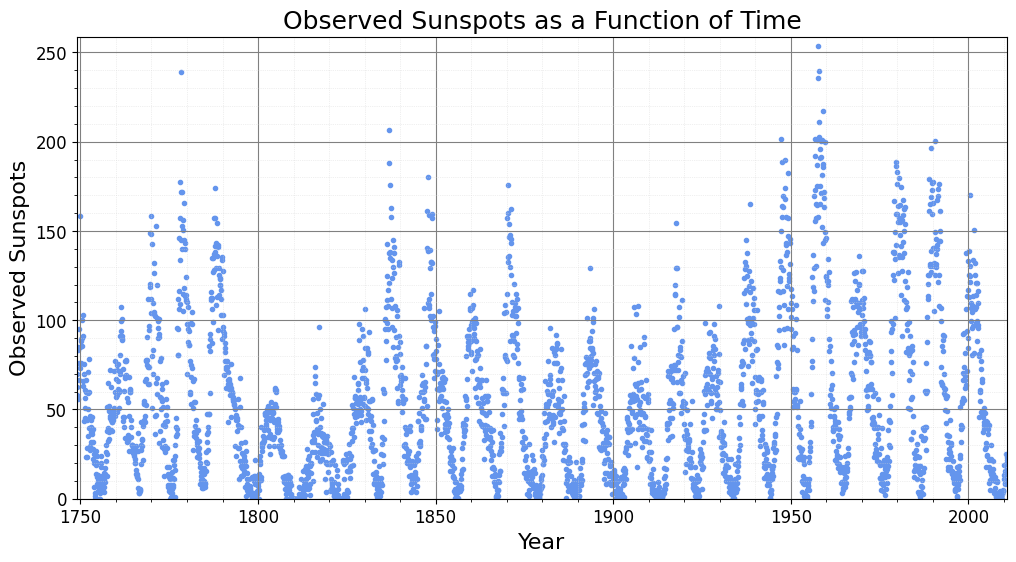

In [38]:
time_years = (time_months / 12.0) + 1749

plt.rcParams.update({
    'axes.titlesize': 18,  # Title
    'axes.labelsize': 16,  # X and Y labels
    'xtick.labelsize': 12, # X tick labels
    'ytick.labelsize': 12,  # Y tick labels
    'legend.fontsize': 14    # Legend
})


plt.figure(figsize=(12, 6)) 
#plt.bar(time_years, sunspots, width=1/12.0, color="cornflowerblue")
plt.scatter(time_years, sunspots, color="cornflowerblue",marker='.')

plt.xlabel("Year")
plt.ylabel("Observed Sunspots")
plt.title("Observed Sunspots as a Function of Time")

#plt.axvline(2505/12+1749,color='r')
plt.xlim(min(time_years),max(time_years))
plt.ylim(0,max(sunspots)+5)

plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

plt.show()

#plt.savefig("sunspot.png",dpi=500, bbox_inches='tight')

In [5]:
# estimate
# peak 1 ~ 65 months
# peak 2 ~ 195 months
# peak 3 ~ 325 months
# --> ~130months cycle length

b) Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude $|c_k|^2$ of the Fourier coefficients as a function of $k$--also called the power spectrum of the sunspot signal. You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$. The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it--meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.

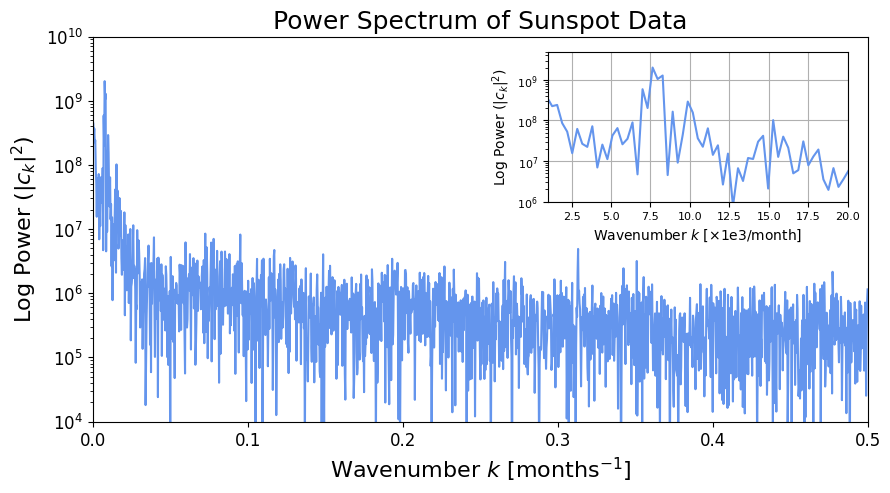

In [28]:
from scipy.fft import fft, fftfreq

N = len(sunspots)

fft_coeffs = fft(sunspots)
frequencies = fftfreq(N, d=1)

# We only care about positive frequencies
positive_mask = frequencies > 0
freqs = frequencies[positive_mask]

# |c_k|^2
power = np.abs(fft_coeffs[positive_mask])**2
peak_frequency = freqs[np.argmax(power)]

# cycle length
period_months = 1 / peak_frequency


fig, ax_main = plt.subplots(figsize=(10, 5))

# Plot on the main axes
ax_main.semilogy(freqs, power, color="cornflowerblue")
ax_main.set_xlabel("Wavenumber $k$ [months$^{-1}$]")
ax_main.set_ylabel("Log Power ($|c_k|^2$)")
ax_main.set_title("Power Spectrum of Sunspot Data")
#ax_main.grid(True)
#ax_main.axvline(0.015,color='r')

ax_main.set_xlim(0, 0.5)
ax_main.set_ylim(1e4,1e10)

# --- Add the inset subplot ---
left, bottom, width, height = [0.58, 0.55, 0.3, 0.3]
ax_inset = fig.add_axes([left, bottom, width, height])

ax_inset.semilogy(freqs*1e3, power, color="cornflowerblue")
#ax_inset.set_title("Region of Interest")

ax_inset.set_xlim(1, 20) 
ax_inset.set_ylim(1e6,5e9) 
ax_inset.set_xlabel("Wavenumber $k$ [$\\times$1e3/month]", fontsize=10)
ax_inset.set_ylabel("Log Power ($|c_k|^2$)", fontsize=10)
ax_inset.grid(True)

# Adjust tick label font size
ax_inset.tick_params(axis='both', which='major', labelsize=8)

#plt.show()
plt.savefig("Power.png",dpi=700, bbox_inches='tight')

c) Find the approximate value of $k$ to which the peak corresponds. What is the period of the sine wave with this value of $k$? You should find that the period corresponds roughly to the length of the cycle that you estimated in part (a).

In [29]:
# 0.0076/months -> period of 130months

## 7.4

### Fourier filtering and smoothing

In the on-line resources you'll find a file called `dow.txt`. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

Write a program to do the following:

a) Read in the data from `dow.txt` and plot them on a graph.



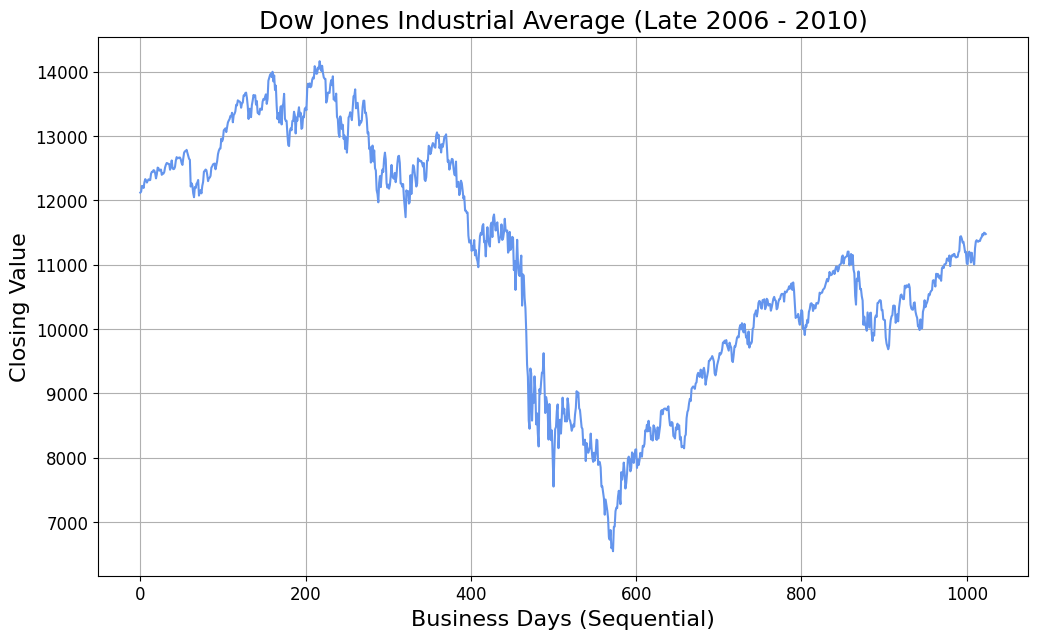

In [30]:
data = pd.read_csv("/home/xavier/Downloads/dow.txt", header=None, names=['Value'])
plt.figure(figsize=(12, 7)) 
plt.plot(data['Value'], color="cornflowerblue")

plt.title('Dow Jones Industrial Average (Late 2006 - 2010)')
plt.xlabel('Business Days (Sequential)')
plt.ylabel('Closing Value')

plt.grid(True)

plt.show()

b) Calculate the coefficients of the discrete Fourier transform of the data using the function `rfft` from `numpy.fft`, which produces an array of $\frac{1}{2}N + 1$ complex numbers.



In [31]:
values_array = data['Value'].to_numpy()

fft_coeffs = np.fft.rfft(values_array)

print(fft_coeffs[:5])

[11283903.94           +0.j           684127.73979081-955087.51914779j
  -419226.20512243 +92908.95615825j    74190.14983158-273812.25003958j
   -35185.68105221 +72365.86128838j]


c) Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%).



In [32]:
num_coeffs = len(fft_coeffs)
ten_percent_index = int(num_coeffs * 0.1) 
fft_coeffs[ten_percent_index:] = 0

d) Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function `irfft`, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero?



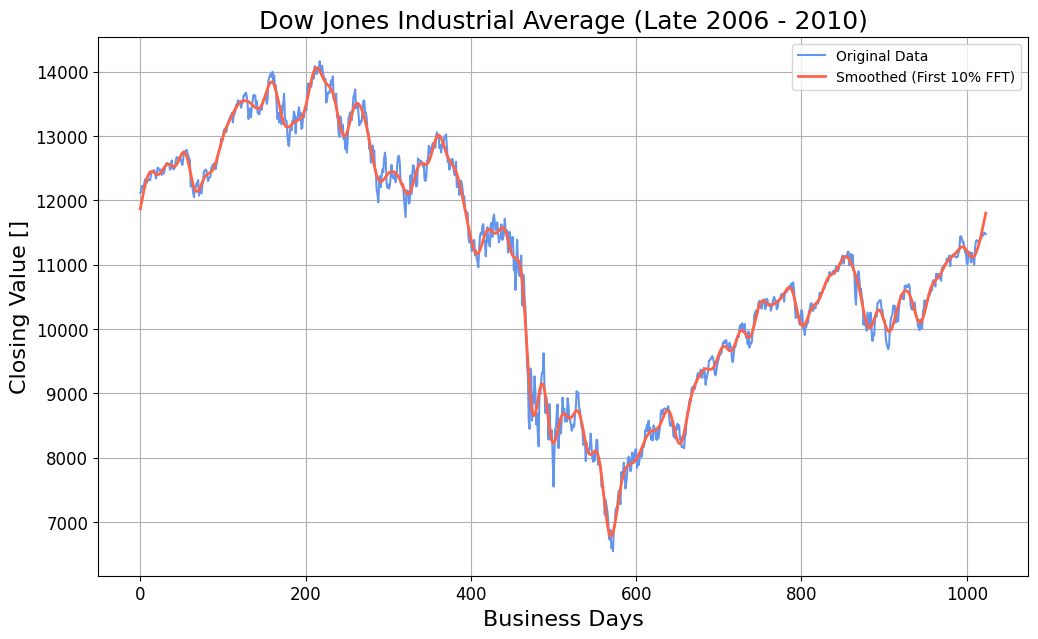

In [33]:
smoothed_values = np.fft.irfft(fft_coeffs)
plt.figure(figsize=(12, 7)) 

plt.plot(values_array, label='Original Data', color="cornflowerblue")

plt.plot(smoothed_values, label='Smoothed (First 10% FFT)', color='tomato', linewidth=2)

plt.title('Dow Jones Industrial Average (Late 2006 - 2010)')
plt.xlabel('Business Days')
plt.ylabel('Closing Value []')

plt.legend()
plt.grid(True)

plt.show()


e) Modify your program so that it sets all but the first 2% of the coefficients to zero and run it again.

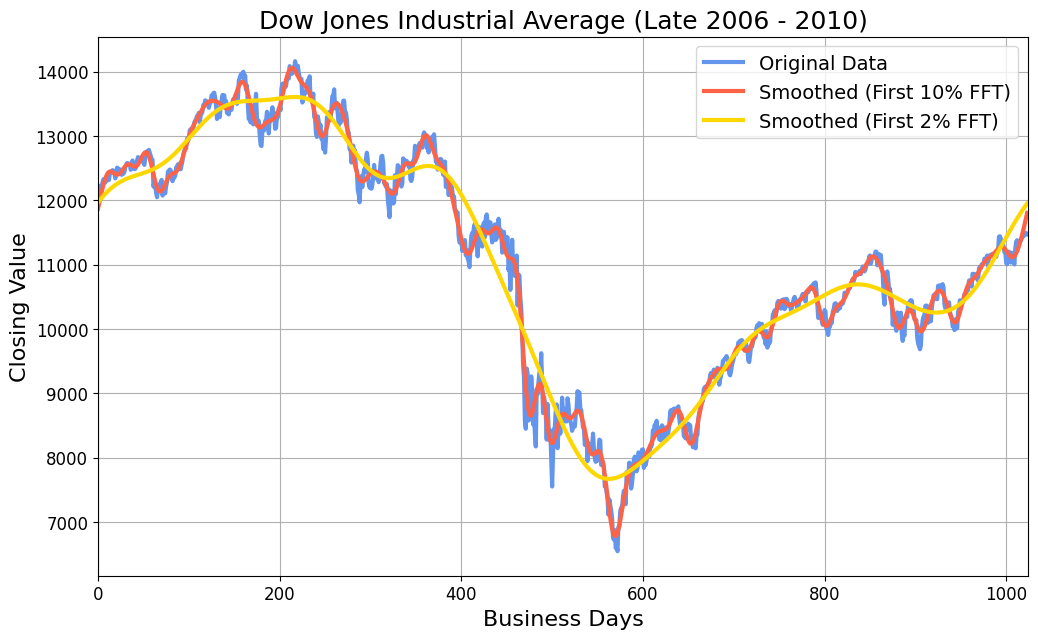

In [40]:
fft_coeffs2 = np.fft.rfft(values_array)
num_coeffs2 = len(fft_coeffs2)

two_percent_index = int(num_coeffs2 * 0.02) 

fft_coeffs2[two_percent_index:] = 0
smoothed_values2 = np.fft.irfft(fft_coeffs2)

plt.figure(figsize=(12, 7)) 

plt.plot(values_array, label='Original Data', color="cornflowerblue", linewidth=3)

plt.plot(smoothed_values, label='Smoothed (First 10% FFT)', color='tomato', linewidth=3)
plt.plot(smoothed_values2, label='Smoothed (First 2% FFT)', color='gold', linewidth=3)

plt.title('Dow Jones Industrial Average (Late 2006 - 2010)')
plt.xlabel('Business Days')
plt.ylabel('Closing Value')

plt.xlim(0,len(values_array))
plt.legend()
plt.grid(True)

#plt.show()
plt.savefig("dow.png",dpi=700, bbox_inches='tight')

## 7.9

a) On the web site you will find a file called blur.txt that contains a grid of values representing brightness on a black-and-white photo—a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width σ=25. Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)



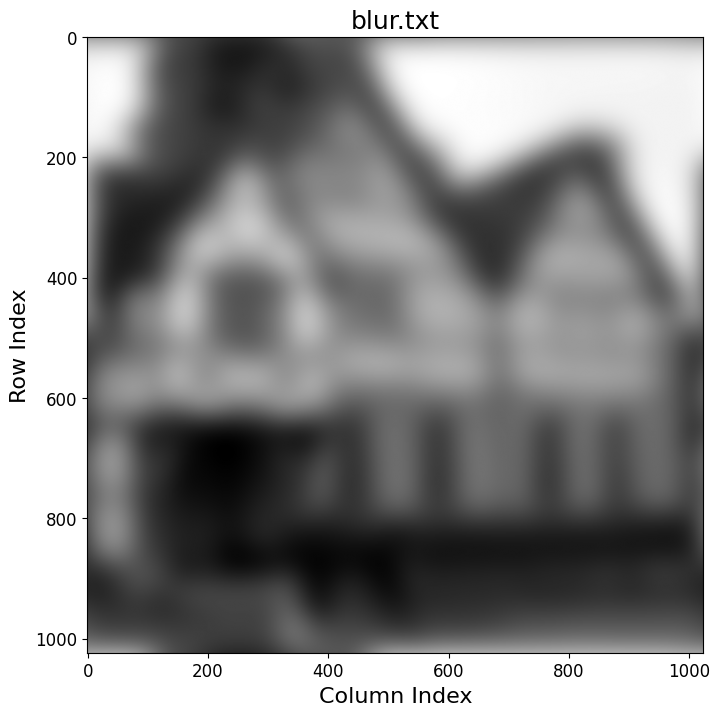

In [129]:
file_path = '~/Downloads/blur.txt'

df = pd.read_csv(
        file_path, 
        header=None, 
        sep=r'\s+', 
        engine='python', 
        skipinitialspace=True
    )
    
df = df.dropna(axis=1, how='all')

# print(df.head())

image_data = df.values
image = df.values

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 

#plt.show()
plt.savefig("blur.png",dpi=700, bbox_inches='tight')

b) Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian f(x,y) above with σ=25. Make a density plot of these values on the screen too, so that you get a visualization of your point spread function. Remember that the point spread function is periodic (along both axes), which means that the values for negative x and y are repeated at the end of the interval. Since the Gaussian is centered on the origin, this means there should be bright patches in each of the four corners of your picture, something like this:

IMAGE



In [90]:
def gaussian2D(x,y,s):
    return np.exp(-(x*x+y*y)/(2*s*s))

In [91]:
image_data = np.ones((1024,1024))
def psf(s):
    psfv = np.zeros((1024,1024))
    for i in range(len(psfv)):
        for j in range(len(psfv)):
            psfv[i][j] += gaussian2D(i,j,s)
    psfv += np.rot90(psfv)+np.rot90(np.rot90(psfv))+np.rot90(np.rot90(np.rot90(psfv)))
    return psfv

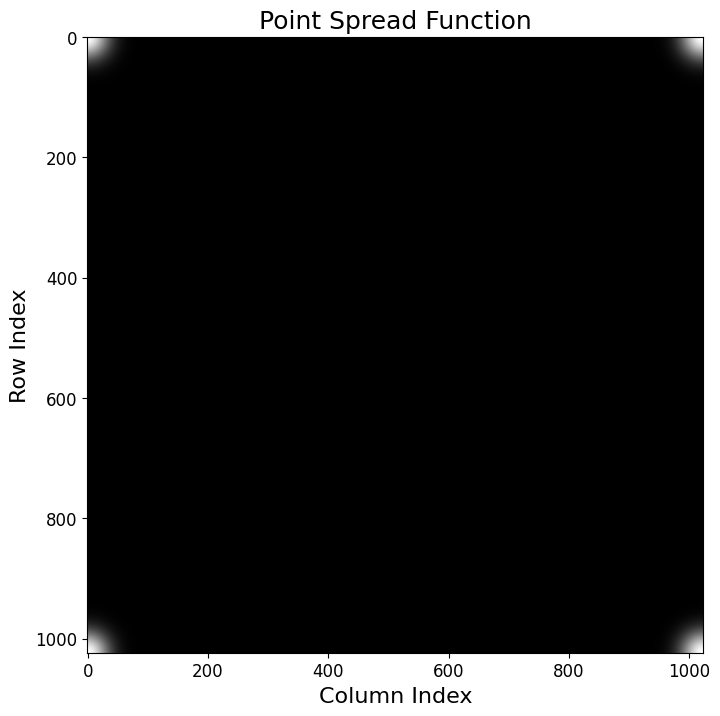

In [130]:
image_data = psf(25)

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray')

plt.title('Point Spread Function')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 

#plt.show()
plt.savefig("psf.png",dpi=700, bbox_inches='tight')

c) Combine your two programs and add Fourier transforms using the functions rfft2 and irfft2 from numpy.fft, to make a program that does the following:

i) Reads in the blurred photo ii) Calculates the point spread function iii) Fourier transforms both iv) Divides one by the other v) Performs an inverse transform to get the unblurred photo vi) Displays the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp.

Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount ϵ you don't divide by it—just leave that coefficient alone. The value of ϵ is not very critical but a reasonable value seems to be 10−3.



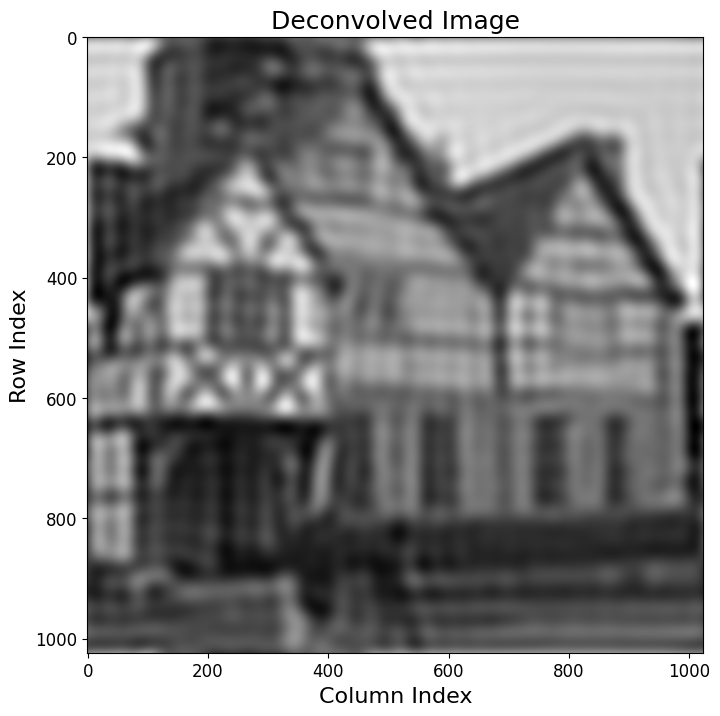

In [158]:
def norm(image):
    return image/np.abs(np.max(image))
def sharpen(image,psf,sharp):
    fftpsf = np.fft.rfft2(psf)+sharp
    fftimage= np.fft.rfft2(image)
    divfft = fftimage/fftpsf
    return np.fft.irfft2(divfft)

newim = sharpen(norm(image),psf(25),4.957847863884449+1.32860010114397575j)
plt.figure(figsize=(8, 8))
plt.imshow(newim, cmap='gray')

plt.title('Deconvolved Image')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 
#print(sharpq(newim))
#plt.show()
#print(np.min(np.fft.rfft2(psf(25))))#-3.957847863884449-0.32860010114397575j
plt.savefig("deconv.png",dpi=700, bbox_inches='tight')

d) Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo? Why can we not perfectly unblur any photo and make it completely sharp?

We have seen this process in action here for a normal snapshot, but it is also used in many physics applications where one takes photos. For instance, it is used in astronomy to enhance photos taken by telescopes. It was famously used with images from the Hubble Space Telescope after it was realized that the telescope's main mirror had a serious manufacturing flaw and was returning blurry photos—scientists managed to partially correct the blurring using Fourier transform techniques.

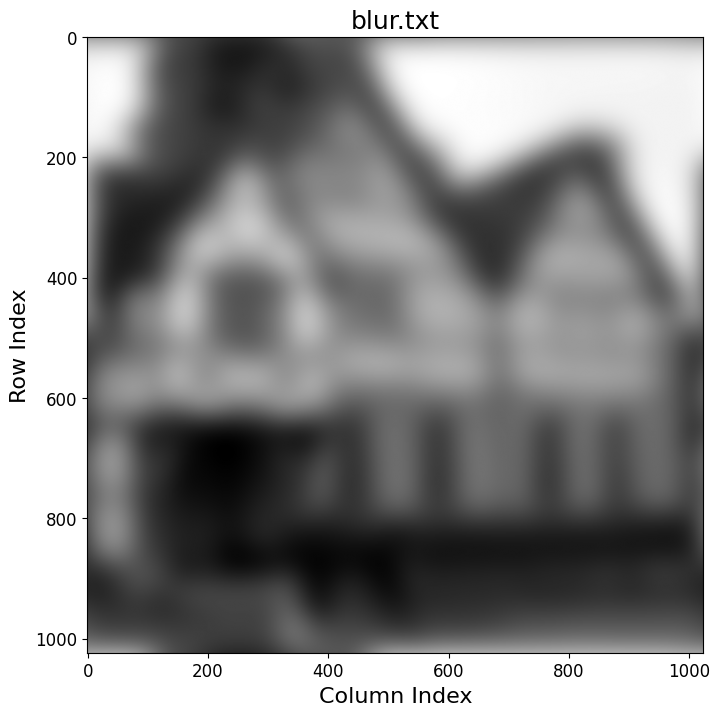

In [126]:
# 1. Read 'blur.txt' into a Pandas DataFrame
file_path = '~/Downloads/blur.txt'

df = pd.read_csv(
        file_path, 
        header=None, 
        sep=r'\s+', 
        engine='python', 
        skipinitialspace=True
    )
    
df = df.dropna(axis=1, how='all')

# print(df.head())

image_data = df.values
image = df.values

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 

plt.show()

In [42]:
len(df)

1024

In [43]:
def gaussian2D(x,y,s):
    return np.exp(-(x*x+y*y)/(2*s*s))

In [44]:
image_data = np.ones((1024,1024))

# plt.figure(figsize=(8, 8))
# plt.imshow(image_data, cmap='gray')

# plt.title('blur.txt')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# #plt.colorbar(label='Value') 

# plt.show()

In [45]:
def psf(s):
    psfv = np.zeros((1024,1024))
    for i in range(len(psfv)):
        for j in range(len(psfv)):
            psfv[i][j] += gaussian2D(i,j,s)
    psfv += np.rot90(psfv)+np.rot90(np.rot90(psfv))+np.rot90(np.rot90(np.rot90(psfv)))
    return psfv

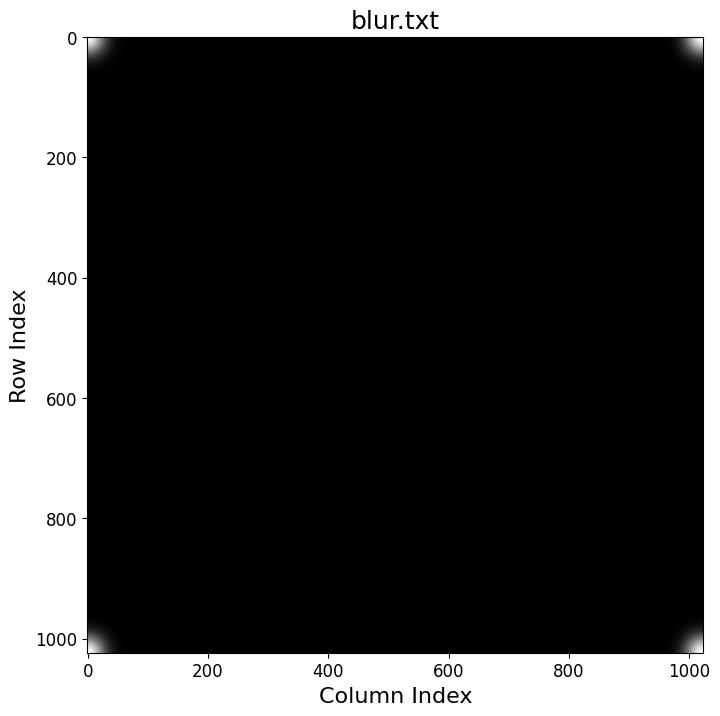

In [46]:
image_data = psf(20)

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 

plt.show()

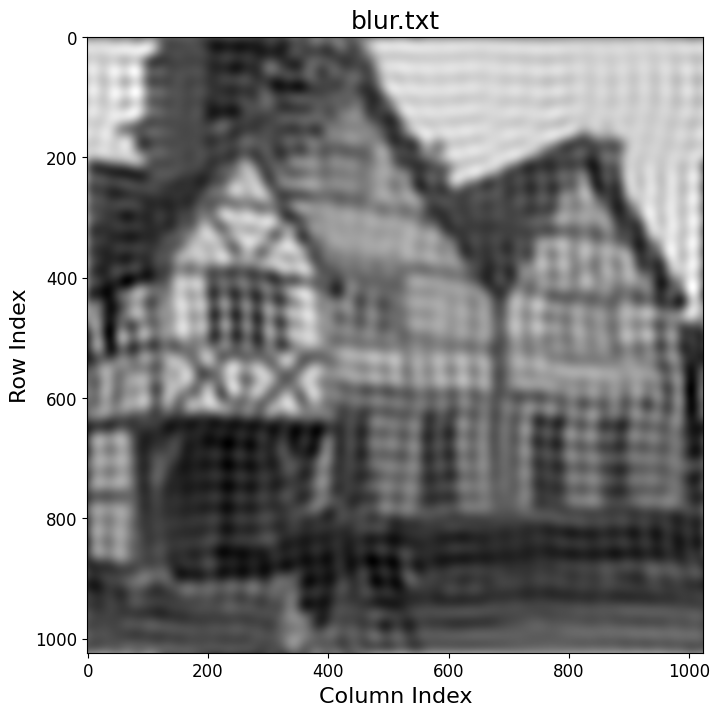

In [50]:
plt.figure(figsize=(8, 8))
plt.imshow(newim, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 
#print(image)
plt.show()

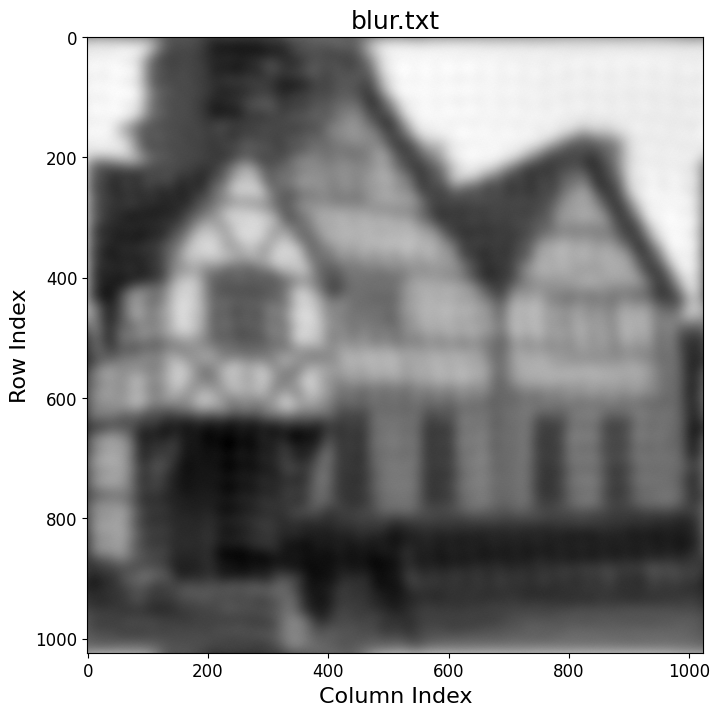

In [87]:
def norm(image):
    return image/np.max(image)
def sharpen(image,psf,sharp):
    fftpsf = np.fft.rfft2(psf)+sharp
    fftimage= np.fft.rfft2(image)
    divfft = fftimage/fftpsf
    return np.fft.irfft2(divfft)

newim = sharpen(image,psf(20),1e-3-1e-3j)
plt.figure(figsize=(8, 8))
plt.imshow(newim, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 
#print(sharpq(newim))
plt.show()


0.0


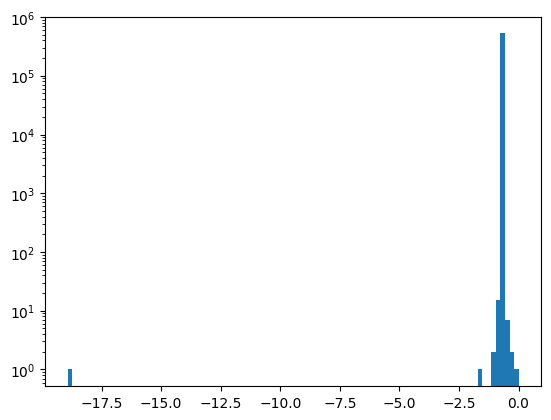

In [508]:
imagefft = norm(np.imag(np.fft.rfft2(image))+np.abs(np.min(np.imag(np.fft.rfft2(image))))+1)
# for i,im in enumerate(imagefft):
#     im = im

print(np.max(np.log(imagefft)))
plt.hist(np.log(np.ndarray.flatten(imagefft)),100,log=True)
# plt.xlim(-0.705,-0.68)
plt.show()

0.0


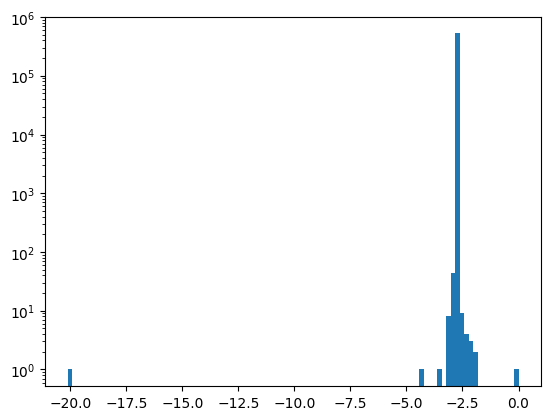

In [517]:
imagefft = norm(np.real(np.fft.rfft2(image))+np.abs(np.min(np.real(np.fft.rfft2(image))))+1)
# for i,im in enumerate(imagefft):
#     im = im

print(np.max(np.log(imagefft)))
plt.hist(np.log(np.ndarray.flatten(imagefft)),100,log=True)
# plt.xlim(-0.705,-0.68)
plt.show()

0.0


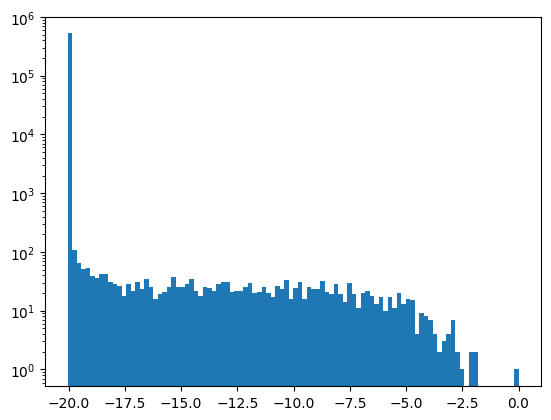

In [518]:
imagefft = norm(np.abs(np.fft.rfft2(image))+np.abs(np.min(np.abs(np.fft.rfft2(image))))+1)
# for i,im in enumerate(imagefft):
#     im = im

print(np.max(np.log(imagefft)))
plt.hist(np.log(np.ndarray.flatten(imagefft)),100,log=True)
# plt.xlim(-0.705,-0.68)
plt.show()

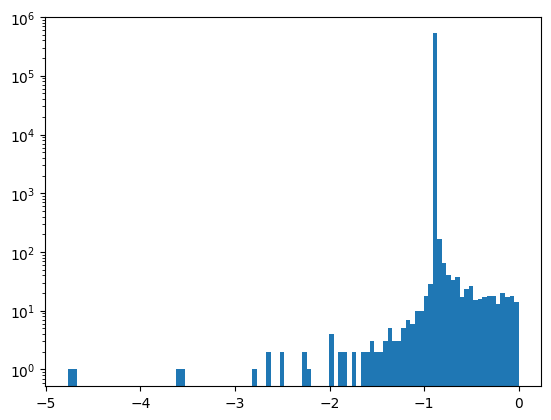

In [516]:
psffft = norm(np.imag(np.fft.rfft2(psf(25)))+np.abs(np.min(np.imag(np.fft.rfft2(psf(25)))))+1)
# for i,im in enumerate(imagefft):
#     im = im
plt.hist(np.log(np.ndarray.flatten(psffft)),100,log=True)
# plt.xlim(-0.705,-0.68)
plt.show()

In [410]:

def sharpen(image,psf,sharp):
    fftpsf = np.fft.rfft2(psf)+sharp
    fftimage= np.fft.rfft2(image)
    divfft = fftimage/fftpsf
    return np.fft.irfft2(divfft)
def norm(image):
    return image/np.max(image)

image1 = sharpen(image,psf,1e-5)
image2 = sharpen(image,psf,1e-8)
image3 = norm(image1)-norm(image2)#sharpen(nimage,psf,5e-2)
#n3image=nimage+0.1*n2image
image4 = sharpen(norm(image1)+2*norm(image)-norm(image2),psf,10000)#n3image/np.max(n3image)-1*n2image/np.max(n2image)#sharpen(n3image,psf,1000)

image5 = sharpen(image,psf,10)
image6 = sharpen(image,psf,1)
image7 = sharpen(image,psf,0.1)
image8 = sharpen(image,psf,0.01)

# fftpsf = np.fft.rfft2(psf)+1e2
# fftimage= np.fft.rfft2(image)
# divfft = fftimage/fftpsf
# nimage = np.fft.irfft2(divfft)

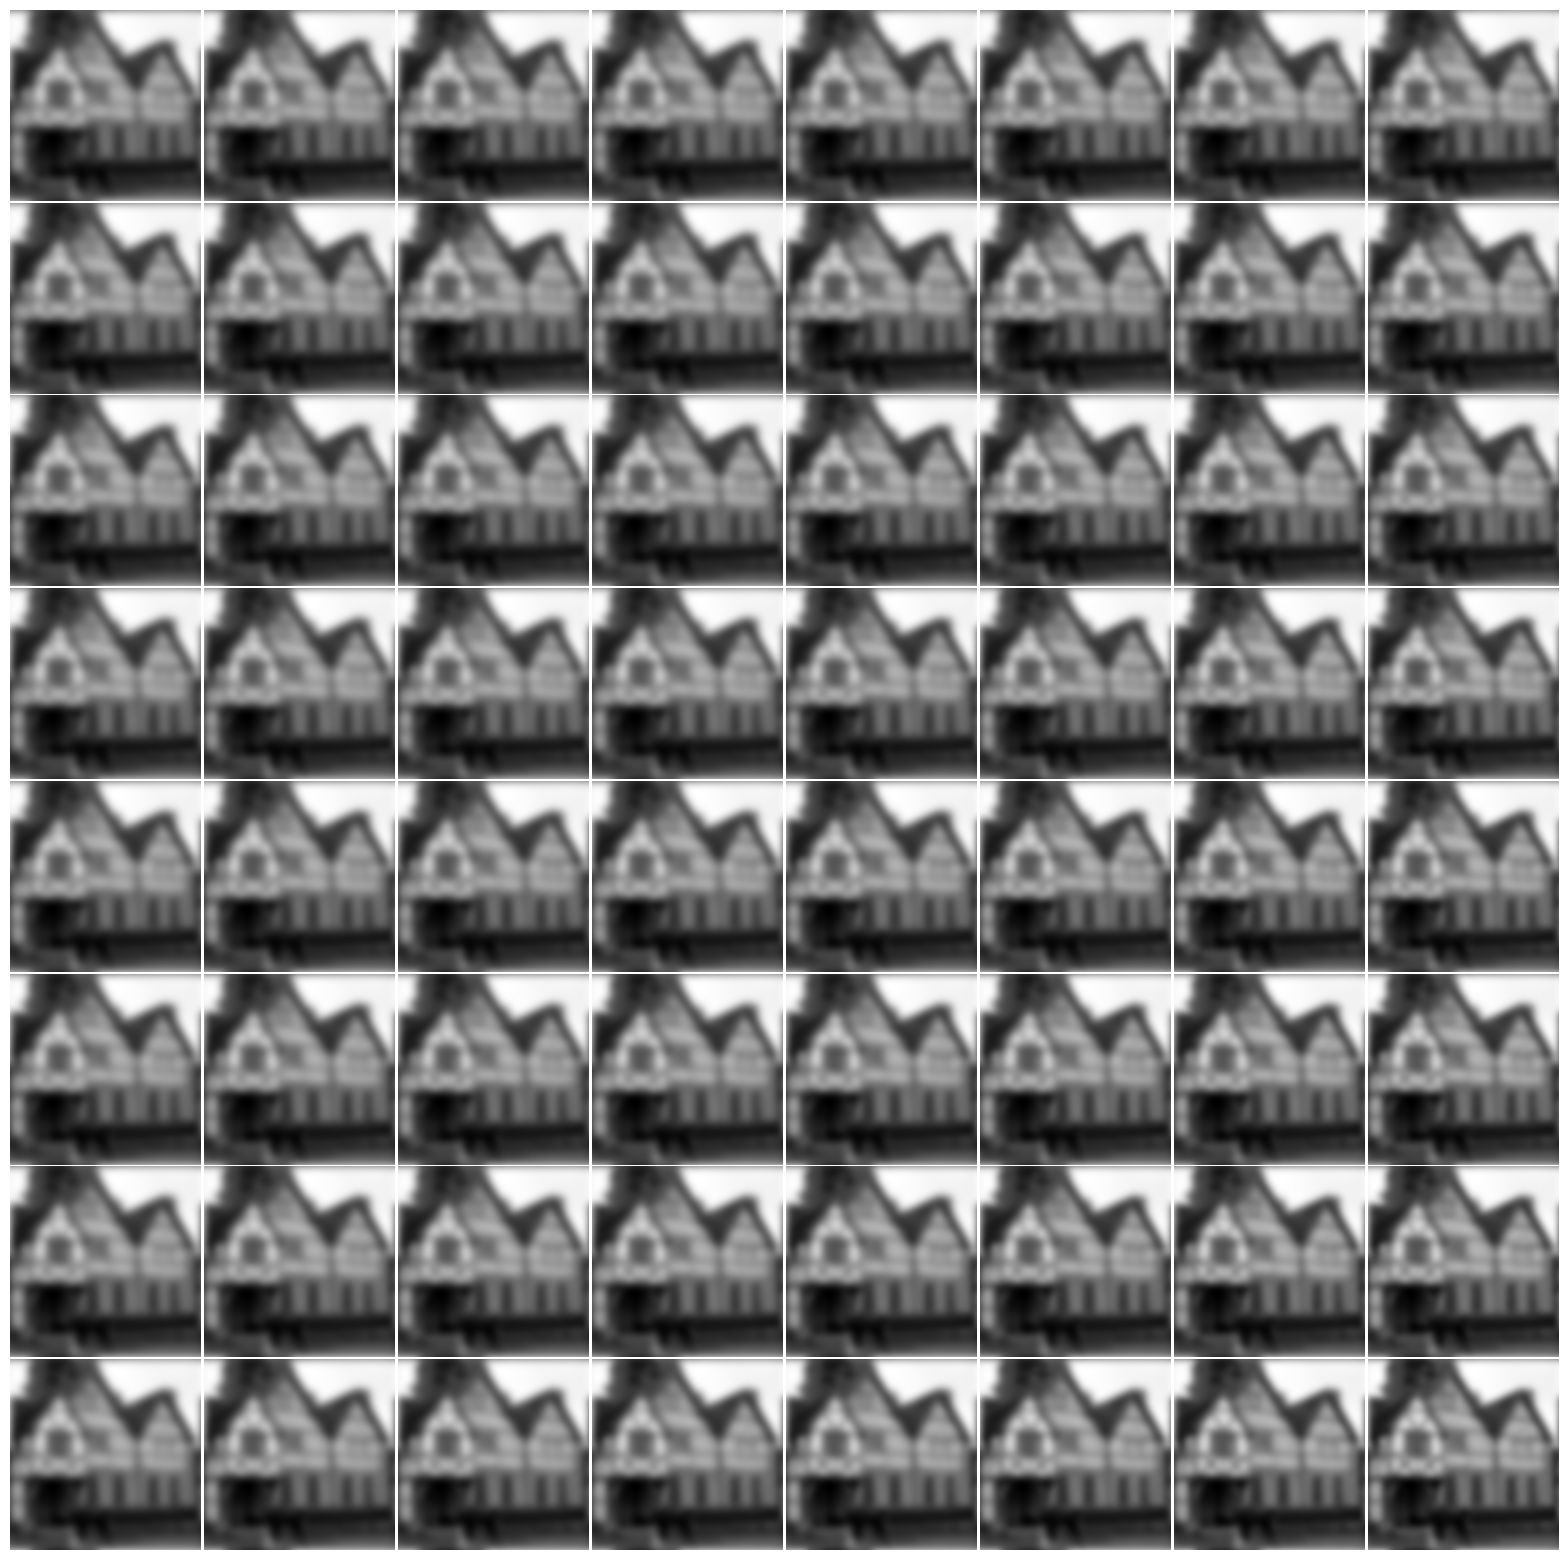

In [420]:
fig, axes = plt.subplots(8, 8, figsize=(20, 20))
for i,axi in enumerate(axes):
    for j,axj in enumerate(axes[i]):
        axj.imshow(sharpen(image,psf(i+j+1),1), cmap='gray')
        axj.axis('off')
plt.subplots_adjust(hspace=0.01, wspace=0.01) 
#plt.tight_layout(h_pad=-5) 
plt.show()

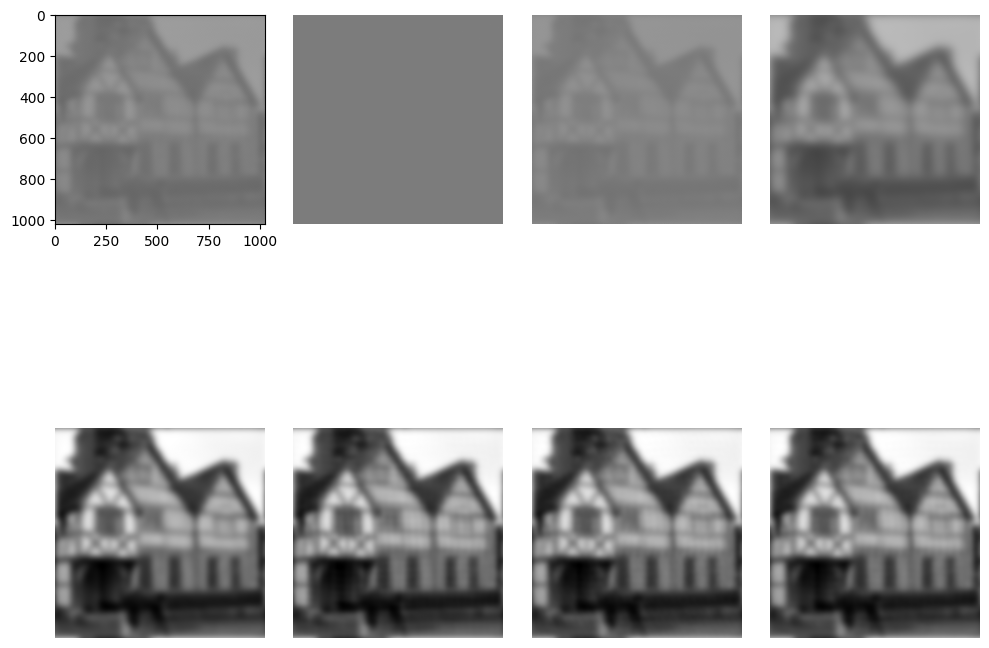

In [373]:
fig, axes = plt.subplots(2, 4, figsize=(10, 10)) 

axes[0][0].imshow(image1, cmap='gray')

# 3. Display the second image in the second subplot
axes[0][1].imshow(image2, cmap='gray')
#axes[0][1].set_title('Image 2')
axes[0][1].axis('off')
# 3. Display the second image in the second subplot
axes[0][2].imshow(image3, cmap='gray')
#axes[0][2].set_title('Image 3')
axes[0][2].axis('off')

# 3. Display the second image in the second subplot
axes[0][3].imshow(image4, cmap='gray')
#axes[0][3].set_title('Image 4')
axes[0][3].axis('off')

# 2. Display the first image in the first subplot
axes[1][0].imshow(image5, cmap='gray') # You can specify a colormap
#axes[1][0].set_title('Image 1')
axes[1][0].axis('off') # Hide axes ticks and labels for cleaner image display

# 3. Display the second image in the second subplot
axes[1][1].imshow(image6, cmap='gray')
#axes[1][1].set_title('Image 2')
axes[1][1].axis('off')
# 3. Display the second image in the second subplot
axes[1][2].imshow(image7, cmap='gray')
#axes[1][2].set_title('Image 3')
axes[1][2].axis('off')

# 3. Display the second image in the second subplot
axes[1][3].imshow(image8, cmap='gray')
#axes[1][3].set_title('Image 4')
axes[1][3].axis('off')

# 4. Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# 5. Show the plot
plt.show()

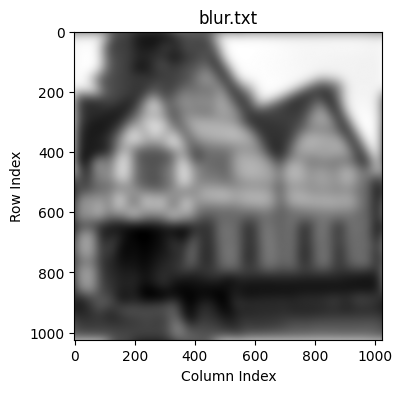

In [311]:
image_data = nimage

plt.figure(figsize=(4, 4))
plt.imshow(image_data, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 

plt.show()

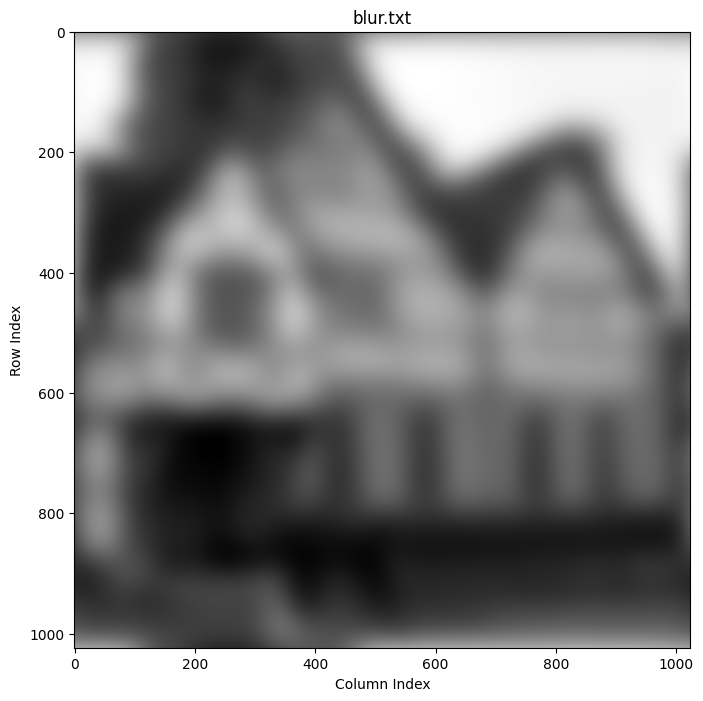

In [84]:

image_data = df.values
image = df.values

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray')

plt.title('blur.txt')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
#plt.colorbar(label='Value') 

plt.show()